In this problem, we will fit logistic regression model to a diabetes dataset of female pima indians.
In particular, all patients are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. 

Outcome is 1 if the person has diabetes, 0 if they did not have diabetes.

Predictor variables includes 
- pregnancies - the number of pregnancies the patient has had
- Glucose level
- BloodPressure
- SkinThickness
- Insulin levels
- Body mass Index or BMI
- Age
- Diabetes Pedigree function - An indicator of how the person's ancestory effects their chances of getting diabetes

In [ ]:
# load the diabetes dataset
# make sure to name yur database variable as 'diabetes'.
# If you choose to use another name, you will need to modify the code in the next step

In [4]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

diabetes = pd.read_csv("diabetes.csv")





In [ ]:
# find the number of rows and columns of the dataset. Hint: use shape

In [5]:
num_rows, num_columns = diabetes.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 768
Number of columns: 9


In [ ]:
#print the first 5 rows of the dataset to visualize the columns

In [8]:
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# What is the proportion of pima indians with diabetes in the dataset?

In [9]:
# Count the number of individuals with diabetes
num_diabetic = diabetes[diabetes['Outcome'] == 1].shape[0]

# Calculate the total number of individuals in the dataset
total_individuals = diabetes.shape[0]

# Calculate the proportion of Pima Indians with diabetes
proportion_diabetic = num_diabetic / total_individuals

print("Proportion of Pima Indians with diabetes:", proportion_diabetic)

Proportion of Pima Indians with diabetes: 0.3489583333333333


In [10]:
# Run this cell to create a new column derived based on the BMI
# Create Obesity status based on BMI column 

Obese = pd.Series([],dtype='object') 

# Obesity status based on BMI

for i in range(len(diabetes)): 
    if diabetes['BMI'][i] == 0.0: 
        Obese[i]="NA"
    
    elif diabetes['BMI'][i] < 30: 
        Obese[i]="Not Obese"
        
    elif diabetes['BMI'][i] >= 30: 
        Obese[i]="Obese"

In [11]:
diabetes.insert(6, "Obese", Obese)

In [12]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Obese,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Not Obese,0.351,31,0
2,8,183,64,0,0,23.3,Not Obese,0.672,32,1
3,1,89,66,23,94,28.1,Not Obese,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


In [ ]:
# What is the Probability that a female has diabetes, given that she is obese?
# What is the probablity that a female has diabetes, given that she is not obese?
# Hint: use crosstab with normalization.

In [13]:
# Create a crosstab to calculate probabilities with normalization
cross_tab = pd.crosstab(diabetes['Outcome'], diabetes['Obese'], normalize='index')

# Extract the probabilities
probability_diabetes_given_obese = cross_tab.loc[1, 'Obese']
probability_diabetes_given_not_obese = cross_tab.loc[1, 'Not Obese']

print("Probability that a female has diabetes, given that she is obese:", probability_diabetes_given_obese)
print("Probability that a female has diabetes, given that she is not obese:", probability_diabetes_given_not_obese)

Probability that a female has diabetes, given that she is obese: 0.8171641791044776
Probability that a female has diabetes, given that she is not obese: 0.17537313432835822


In [ ]:
# P(Diabetes = yes| Obese) = .82
# P(Diabetes = yes| not obese) = .18

In [ ]:
# Create a histogram of features: Glucose. Do you see any unusual values? 
#(e.g. values that are medically not possible)?

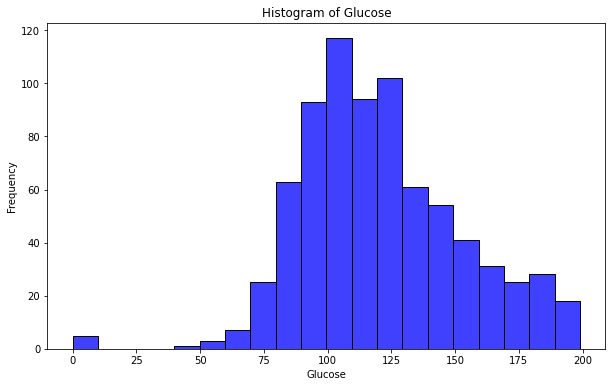

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the 'Glucose' feature
plt.figure(figsize=(10, 6))
sns.histplot(diabetes['Glucose'], kde=False, bins=20, color='blue')
plt.title('Histogram of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

#the values below 50 are not possible

In [ ]:
# Plot the histogram of BloodPressure. Do you see any unusual values? 
# (e.g. values that are medically not possible)

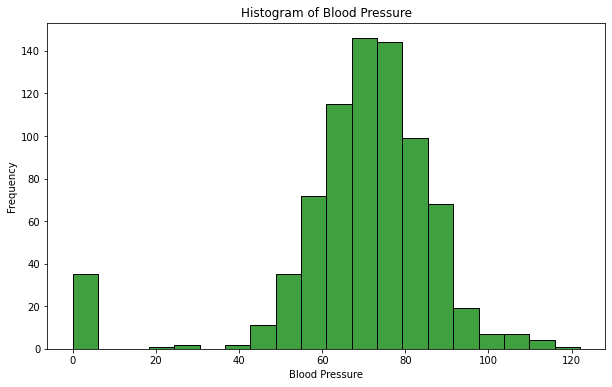

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(diabetes['BloodPressure'], kde=False, bins=20, color='green')
plt.title('Histogram of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

#the values near zero and twenty are not medically possible

In [ ]:
# Plot a scatter plot with bloodpressure on y axis, glucose levels on x axis.
# Use a different color for points that have diabetes vs those that dont have diabetes.

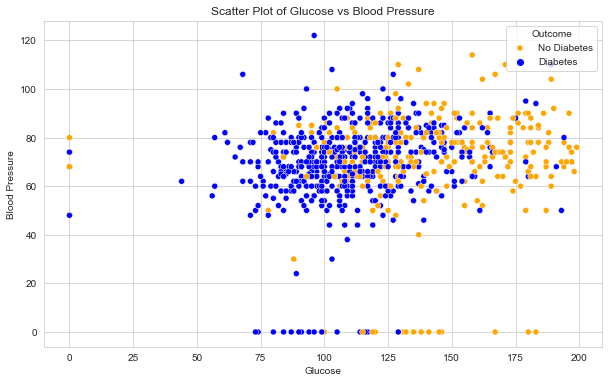

In [16]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diabetes, x='Glucose', y='BloodPressure', hue='Outcome', palette=['blue', 'orange'])
plt.title('Scatter Plot of Glucose vs Blood Pressure')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.legend(title='Outcome', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.show()

In [ ]:
# Create a new dataframe by removing all rows that have 0 for blood pressure and 0 for glucose.
# these are actually missing values and must be handled by using missing data technqiues
# but for this class, we will simply remove the rows.

In [17]:
# Create a new DataFrame by removing rows with 0 blood pressure and 0 glucose
cleaned_diabetes = diabetes[(diabetes['BloodPressure'] != 0) & (diabetes['Glucose'] != 0)]

# Display the first few rows of the cleaned DataFrame
print(cleaned_diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

       Obese  DiabetesPedigreeFunction  Age  Outcome  
0      Obese                     0.627   50        1  
1  Not Obese                     0.351   31        0  
2  Not Obese                     0.672   32        1  
3  Not Obese                     0.167   21        0  
4      Obese                     2.288   33        1  


In [ ]:
# Recreate the scatter plot of glucose on x axis, bloodpressure on y axis 
# by using the modifed dataset from above.

# For all the remianing problems, make sure to use this modified dataset

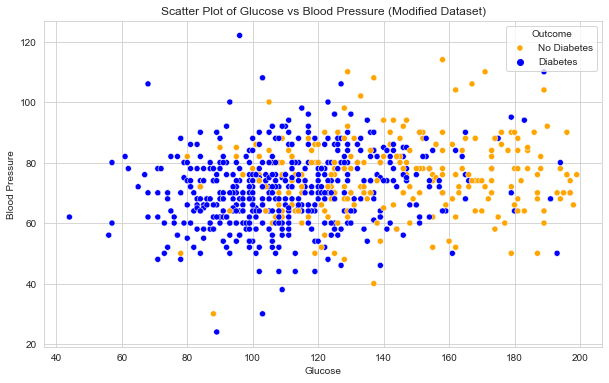

In [18]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create the scatter plot with the modified dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_diabetes, x='Glucose', y='BloodPressure', hue='Outcome', palette=['blue', 'orange'])
plt.title('Scatter Plot of Glucose vs Blood Pressure (Modified Dataset)')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.legend(title='Outcome', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.show()

In [ ]:
# from the above plot, do you see any relation between glucose and diabetes? 
# between bloodpressure and diabetes? 
# Hint: Try to identify regions with higher values of blood pressure and 
#     higher values of Glucose levels


In [ ]:
#low glucose shows more diabatic patients.
# there does not seem to be a relation between blood pressure and glucose or blood pressure and diabetes

In [ ]:
# Create a boxplot with outcome on the x axis and pregnancy on the y axis. 
# Do you see any difference the distribution of pregnancies for diabetic and non diabetic people?

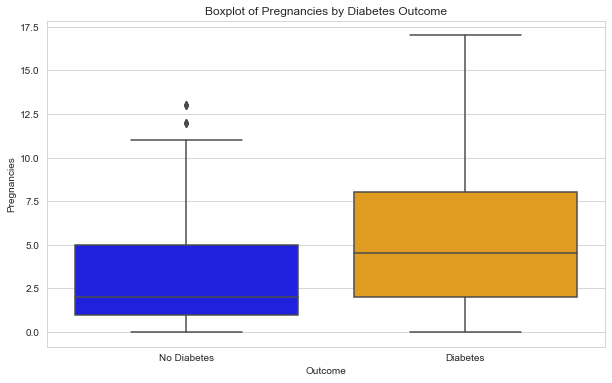

In [19]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_diabetes, x='Outcome', y='Pregnancies', palette=['blue', 'orange'])
plt.title('Boxplot of Pregnancies by Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Pregnancies')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

In [ ]:
#the diabetic person seems to have more range of pregnancies than non diabetic person. 

In [ ]:
# Create a boxplot with outcome on the x axis and BMI on the y axis. 
# Do you see any differences in the distribution of BMI 
# for diabetic and non diabetic people?

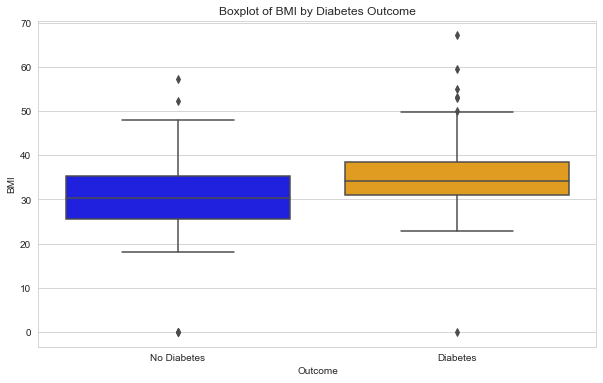

In [21]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_diabetes, x='Outcome', y='BMI', palette=['blue', 'orange'])
plt.title('Boxplot of BMI by Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

In [ ]:
#the diabetic person's median BMI score is higher than non diabetic person.

In [ ]:
# Create a boxplot with outcome on the x axis and age on the y axis. 
# Do you see any differences in the distribution of BMI 
# for diabetic and non diabetic people?

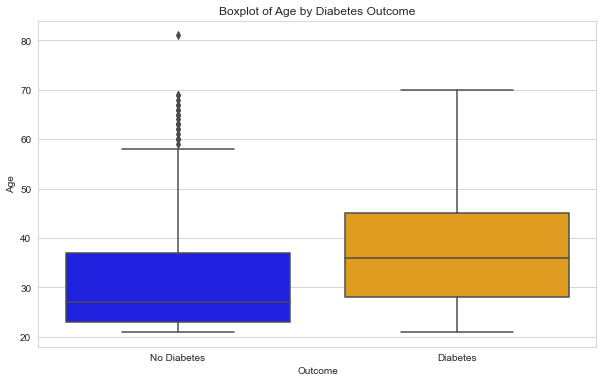

In [24]:
 #Set the style of the plot
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_diabetes, x='Outcome', y='Age', palette=['blue', 'orange'])
plt.title('Boxplot of Age by Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()


In [25]:
#the median age of non diabetic person is lower than diabetic person

# Fitting Logistic Regression

In [ ]:
# Fit a logistic regression model using the following predictors:
# 1. Glucose, BloodPressure, Age, BMI, Pregnancies, Insulin
#Use the Outcome vaiable as the y.
#Note: We dont need to create a dummy variable here, since the outcome is already coded as 0 or 1.

# use statsmodels.api to fit the model.


In [26]:
import statsmodels.api as sm

# Define the predictors (independent variables)
predictors = ['Glucose', 'BloodPressure', 'Age', 'BMI', 'Pregnancies', 'Insulin']

# Add a constant term to the predictors
X = sm.add_constant(cleaned_diabetes[predictors])

# Define the response variable (dependent variable)
y = cleaned_diabetes['Outcome']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)

# Get the results of the logistic regression model
logit_result = logit_model.fit()

# Print the summary of the logistic regression model
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.473027
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  728
Model:                          Logit   Df Residuals:                      721
Method:                           MLE   Df Model:                            6
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.2647
Time:                        15:27:00   Log-Likelihood:                -344.36
converged:                       True   LL-Null:                       -468.30
Covariance Type:            nonrobust   LLR p-value:                 1.168e-50
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.5492      0.797    -10.730      0.000     -10.111      -6.988
Glucose           0.

/Users/atulkumarsharma/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Check the p-values 
# are there any variables that are not significant (i.e. pvalue greater than 0.05?)

In [ ]:
#insulin, blood pressure and age have higher p values

In [ ]:
# Use only the significant features from above and refit the model again

In [27]:
# Define the predictors (significant features)
significant_predictors = ['Glucose', 'BMI', 'Pregnancies']

# Add a constant term to the predictors
X_significant = sm.add_constant(cleaned_diabetes[significant_predictors])

# Fit the logistic regression model with significant features
logit_model_significant = sm.Logit(y, X_significant)

# Get the results of the logistic regression model with significant features
logit_result_significant = logit_model_significant.fit()

# Print the summary of the logistic regression model with significant features
print(logit_result_significant.summary())

Optimization terminated successfully.
         Current function value: 0.475919
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  728
Model:                          Logit   Df Residuals:                      724
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.2602
Time:                        15:34:15   Log-Likelihood:                -346.47
converged:                       True   LL-Null:                       -468.30
Covariance Type:            nonrobust   LLR p-value:                 1.536e-52
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.4787      0.679    -12.484      0.000      -9.810      -7.148
Glucose         0.0361    

/Users/atulkumarsharma/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [131]:
# Logistic regression in sklearn

# Now fit the model in sklearn using the significant features you found in the previous step
# make sure to use the penalty = "none" option when creating the logistic regression model


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the features (X) and the target variable (y)
X = cleaned_diabetes[['Glucose', 'BMI', 'Pregnancies']]
y = cleaned_diabetes['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model with penalty='none'
log_reg = LogisticRegression(penalty='none')
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[87  8]
 [15 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        95
           1       0.82      0.71      0.76        51

    accuracy                           0.84       146
   macro avg       0.84      0.81      0.82       146
weighted avg       0.84      0.84      0.84       146



In [ ]:
# What is the probability of a pima indian to have diabetes if her 
# Glucose level is 100, BMI is 20 and she has had 3 pregnancies?

In [29]:
# Given values for Glucose, BMI, and Pregnancies
glucose_level = 100
bmi = 20
pregnancies = 3

# Create a DataFrame with the given values
input_data = {'Glucose': [glucose_level], 'BMI': [bmi], 'Pregnancies': [pregnancies]}
input_df = pd.DataFrame(input_data)

# Predict the probability of having diabetes
probability_diabetes = log_reg.predict_proba(input_df)[:, 1][0]

print("Probability of having diabetes:", probability_diabetes)


Probability of having diabetes: 0.06915344571609087


In [ ]:
# What is the probability of a pima indian to have diabetes if her 
# Glucose level is 180, BMI is 20 and she has had 3 pregnancies?

In [30]:
# Given values for Glucose, BMI, and Pregnancies
glucose_level = 180
bmi = 20
pregnancies = 3

# Create a DataFrame with the given values
input_data = {'Glucose': [glucose_level], 'BMI': [bmi], 'Pregnancies': [pregnancies]}
input_df = pd.DataFrame(input_data)

# Predict the probability of having diabetes
probability_diabetes = log_reg.predict_proba(input_df)[:, 1][0]

print("Probability of having diabetes:", probability_diabetes)



Probability of having diabetes: 0.5098345854580344


In [ ]:
# what are the increase in odds of having diabetes if the number of pregnancies 
# increases by 1 unit?


In [31]:

# Coefficient for 'Pregnancies' from the logistic regression model
coefficient_pregnancies = 0.1124

# Calculate the increase in odds of having diabetes if the number of pregnancies increases by 1 unit
increase_in_odds = np.exp(coefficient_pregnancies)

print("Increase in odds of having diabetes if the number of pregnancies increases by 1 unit:", increase_in_odds)


NameError: name 'np' is not defined